# Importing different libraries of python for the exploration of the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ABOUT DATASET



A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.




The data set also contains customer demographics (user_id,age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product categorys) and Total purchase_amount from last month.




Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Loading the data for analysis using pandas library

In [2]:
bf=pd.read_csv(r"C:\Users\KAUSHIK\OneDrive\Desktop\DataScience Fullstack\BlackFriday.csv")

In [3]:
bf.shape

(537577, 12)

# DATA CLEANING

In [4]:
bf.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


Context




* The dataset here is a sample of the transactions made in a retail store.
* The store wants to know better the customer purchase behaviour against different products.
* Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.
* There are seven categorical variables to analyse.


Let us list down some points that can be addressed with the analsysis.



i>   Understanding the cutomers on the basis of their purchasing habits.


ii>  Understanding the purchasing habits according to Age groups, Occuptation, City_Categories.


iii> The above segmented group of users can be then used to model the data and use to predict the purchase spend for each customer. Lets dive in by understanding the data.

In [5]:
bf.isnull() #Checking the null values if there in dataset.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,False,False,False,False,False,False,False,False,False,False,True,False
537573,False,False,False,False,False,False,False,False,False,False,False,False
537574,False,False,False,False,False,False,False,False,False,False,True,False
537575,False,False,False,False,False,False,False,False,False,True,True,False


In [6]:
bf.info()   #It  prints information about a DataFrame including the index dtype and columns,
            #non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


*  There are null values in Product_category_2, Product_Category_3

In [7]:
bf.isnull().sum()  #Counts the number of null values in a column.

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

* Total numbers of null values that are present in Product_category_2, Product_Category_3 

In [8]:
bf.describe()   #Retuens the description of data .
                #If it contains any numerical data it provides its count,mean,standard deviation,minimum and
                #percentile (25%,50%,75%,100% or max).

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


* Mean value of Product_Category_2 is 9.8 and that for Product_Category_3 is 12.6, which we will use to fill the missing values in these two columns.

In [9]:
bf.nunique()  #Returns number of unique values.

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [10]:
bf['Product_Category_3']=bf['Product_Category_3']. replace(np.nan,0)
bf['Product_Category_3'] = bf['Product_Category_3'].astype('int64')


In [11]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          537577 non-null  int64  
 11  Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 49.2+ MB


In [12]:
# fill null values of Product_Category_2 column with mode and Product_Catagory_3 with mean of this column.
bf['Product_Category_2'].fillna(bf['Product_Category_2'].mode()[0],inplace=True)
bf['Product_Category_3'].replace(0,(bf['Product_Category_3'].mean()),inplace=True)
bf['Product_Category_3'] = bf['Product_Category_3'].astype('int64')

In [13]:
bf['Product_Category_3']=bf['Product_Category_3'].round(decimals = 1)
bf['Product_Category_2'] = bf['Product_Category_2'].astype('int64')

In [14]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8,3,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,3,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8,3,7969


In [15]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Product_Category_2          537577 non-null  int64 
 10  Product_Category_3          537577 non-null  int64 
 11  Purchase                    537577 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 49.2+ MB


* There are still some special characters, like (+) in the columns 'Age' and 'stay in Current City_Years, which need to be removed, before machine learning algorithms can be run later.

In [16]:
#bf['Age']=(bf['Age'].str.strip('+'))

In [17]:
#bf['Stay_In_Current_City_Years']=(bf['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

* Let us inspect the data now.

In [18]:
bf.info()
bf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Product_Category_2          537577 non-null  int64 
 10  Product_Category_3          537577 non-null  int64 
 11  Purchase                    537577 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 49.2+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8,3,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,3,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8,3,7969


* As can be seen, we have managed to clean the columns to our reuirement and removed the '+' sign from the two columns.



* At this stage, I will exploratory data analysis by visualising the data, in particular, by visualising the statistical relationship between the different variables.

# EDA ON BLACK FRIDAY SALE DATASET

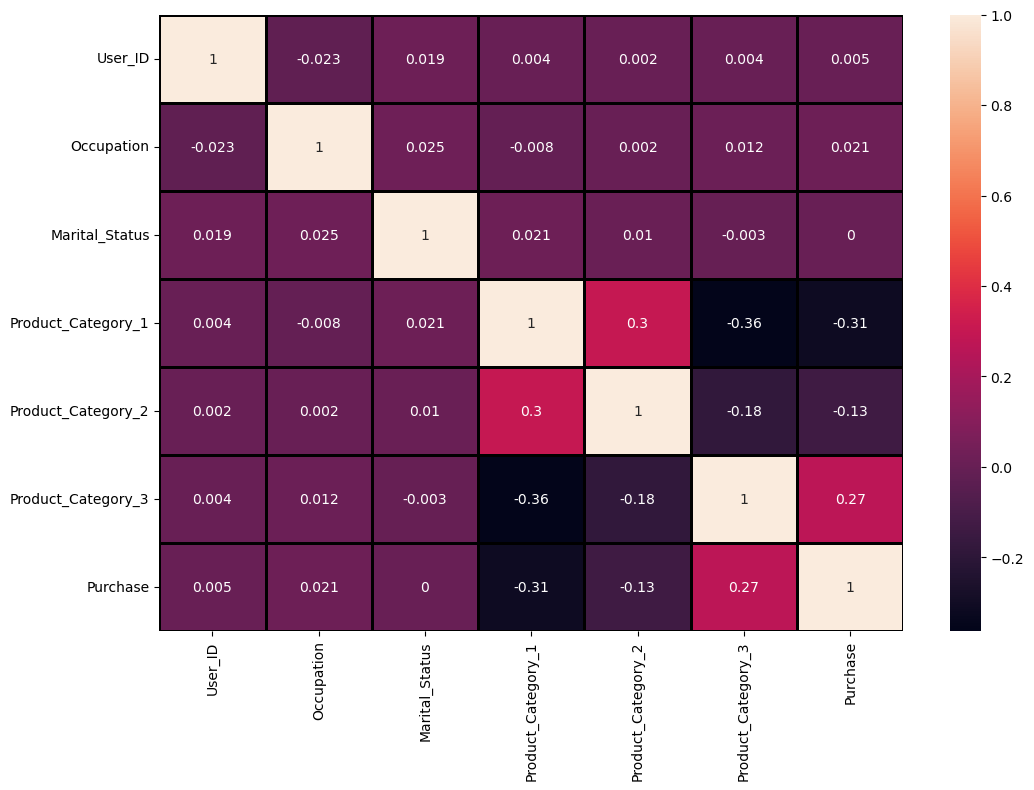

In [19]:
corrmap=bf.corr().round(3)
plt.figure(figsize=(12,8))
sns.heatmap(corrmap,linewidth=2,linecolor='black',annot=True)
plt.show()

* The key take aways from the above plot are the positive correlation coefficients of three features as a function of Purchase:

1) Occupation

2) Stay_In_Current_City_Years

3) Marital Status


* Increase in any of the values for the above three features is likey to result in a higher purchase from the customer.

# 1 ) Univariate Data Analysis

for all columns, let's generate count plot

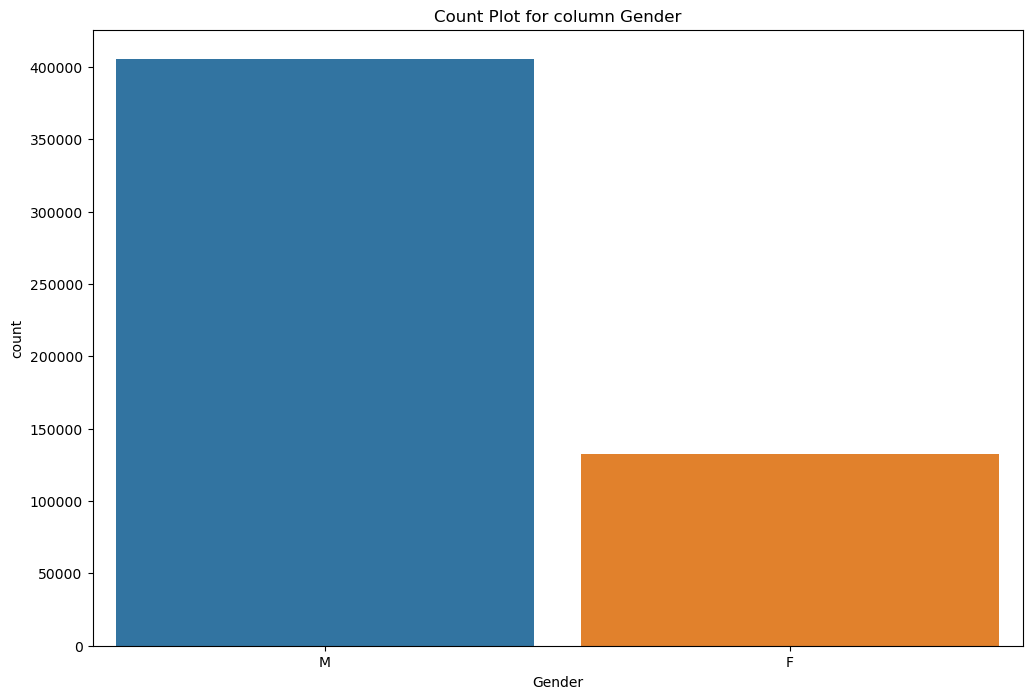

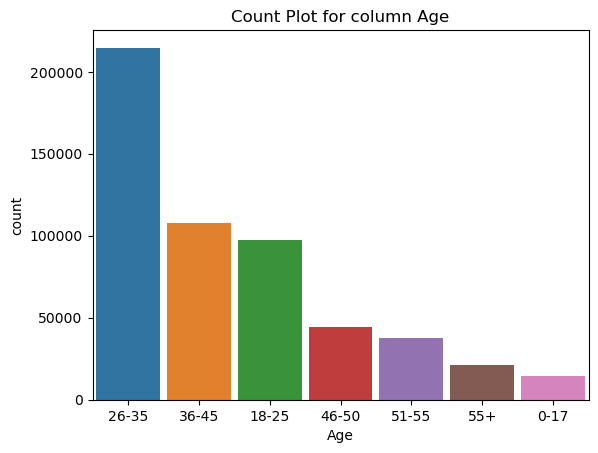

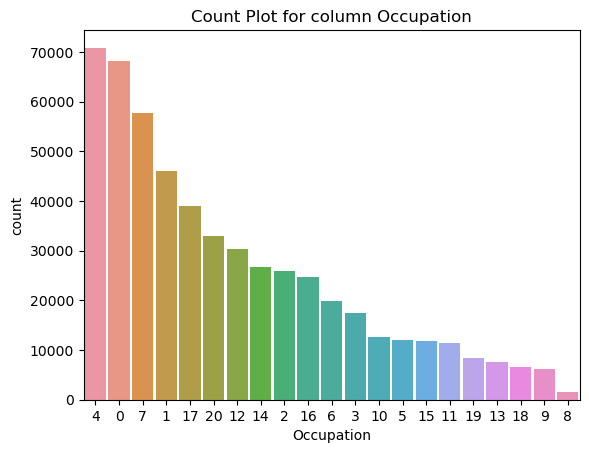

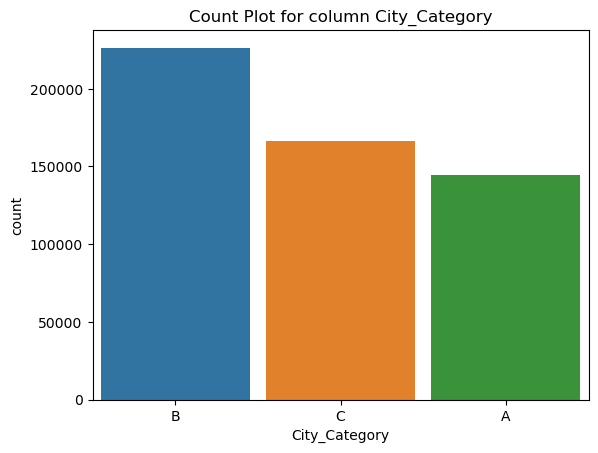

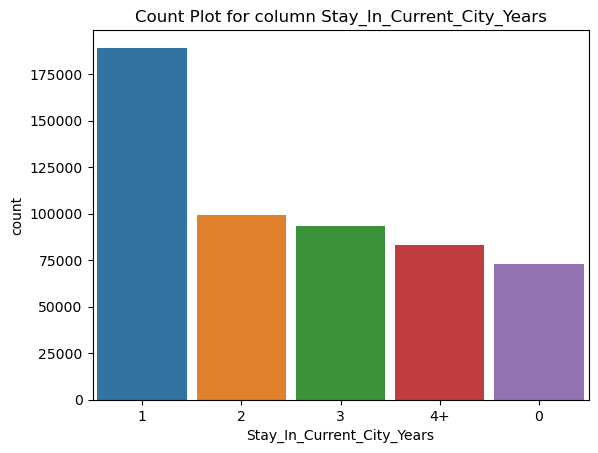

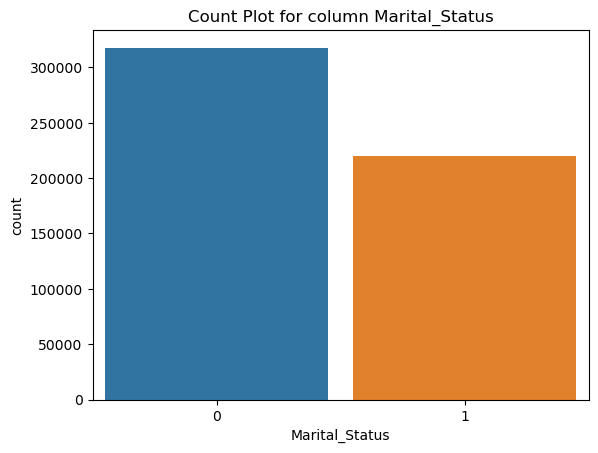

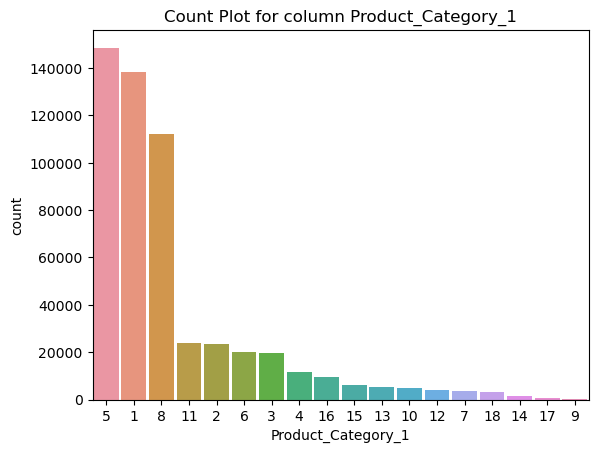

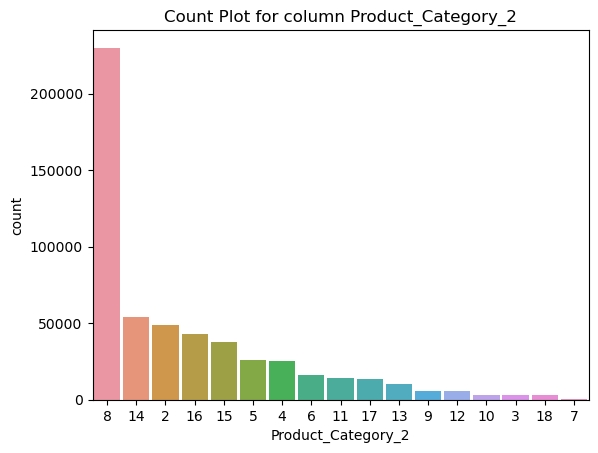

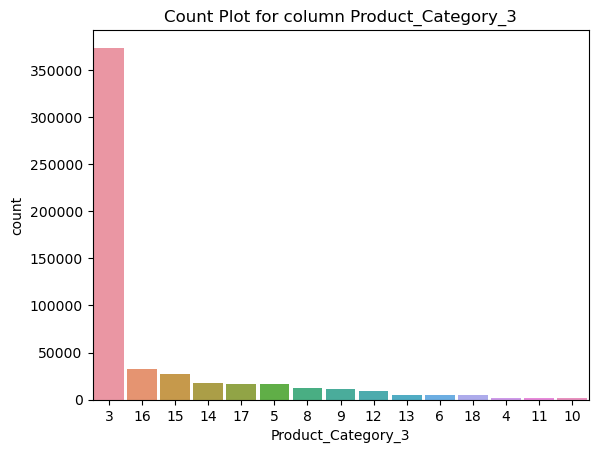

In [20]:
plt.figure(figsize=(12,8))
bfr=bf.round(1)
for col in bfr.columns:
    if (col not in ('User_ID','Product_ID','Purchase')):
        sns.countplot(x=col, data=bfr, order=bfr[col].value_counts().index,width=0.9,linewidth=0.9)
        plt.title("Count Plot for column {}".format(col))
        plt.show()

About dataset, We can observe from above that


* There are more males than females.
* Mostly people are in age group 26-35.
* There are more people who has an occupation 4 & 0.
* Mostly people stay in city B.
* People generally stay in current city for 1 year.
* Maximum people are unmarried.
* Most of the products that were shopped belong to category_1 5,1,8.
* Most of the products have 9.8 = 9 has category_2.
* Most of the products have 12.7 = 12  has category_3.

# 2) Bi-Variate Analysis

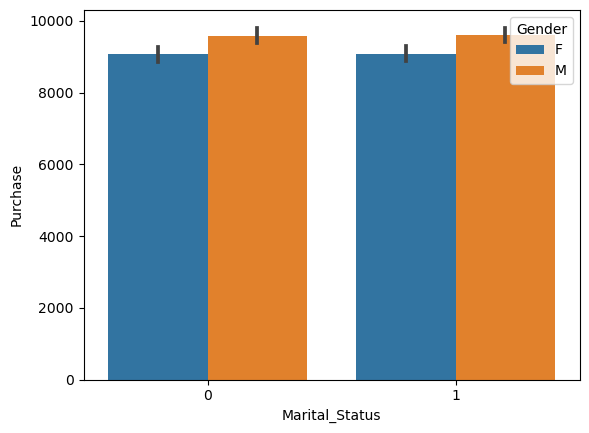

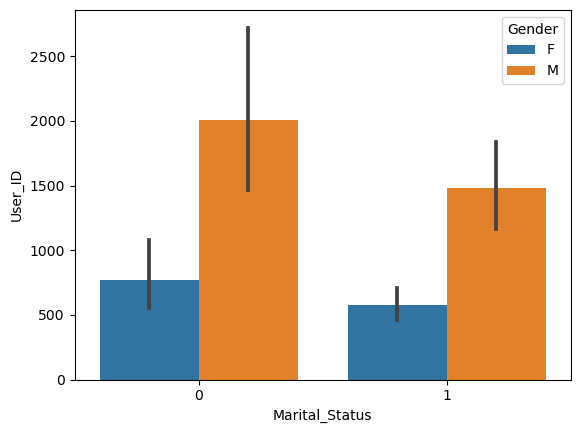

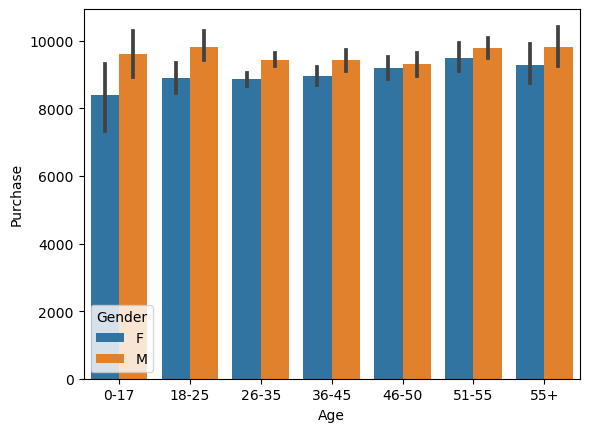

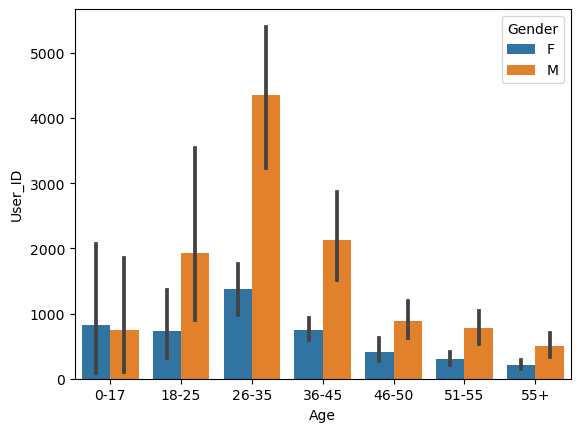

In [21]:
col=['Gender','Marital_Status','Age', 'Occupation']
BFTData_agg=bf.groupby(by=col).agg({'Purchase':'mean', 'User_ID':'count'}).reset_index()
for x_axis in ['Marital_Status','Age']:
    for y_axis in ['Purchase','User_ID']:
        sns.barplot(data=BFTData_agg, x=x_axis,y=y_axis, hue='Gender')
        plt.show()

We can conclude from first two graphs that - Although there are more unmarried people and more males in the city but the amount spent by these two groups are same. It seems like married people and females buy high priced or lower discounted products than unmarried and males.

From third and Forth graphs, there are more males than females in all age groups and more people in dataset belong to 26-35 age group, but amount spent by different age groups are same with same reasoning as above.

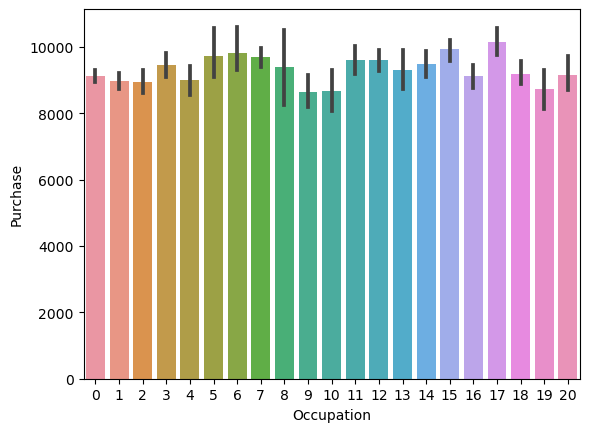

In [22]:
# Lets plot & see if there is same trend for Purchase amount across different Occupations too.
sns.barplot(data=BFTData_agg, x='Occupation', y='Purchase')
plt.show()

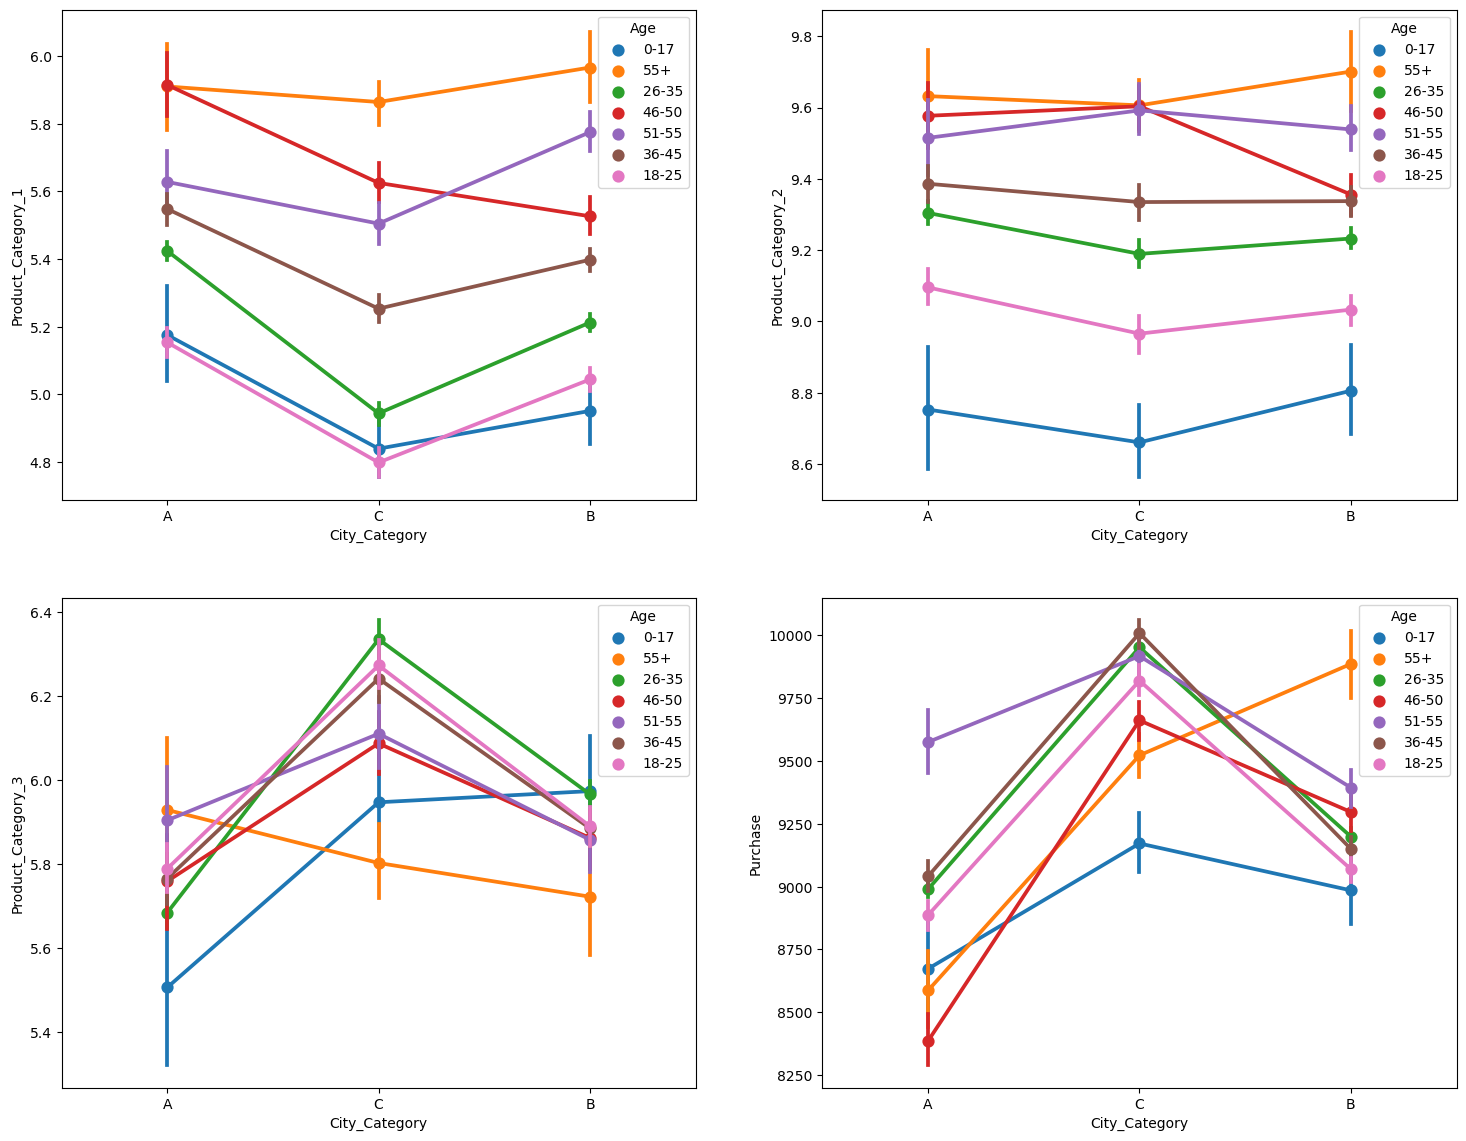

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',
                 data=bf,
                 ax=axes[0,0]
                )
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',
                 data=bf,
                 ax=axes[0,1]
                )
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',
                 data=bf,
                 ax=axes[1,0]
                )
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=bf,
                 ax=axes[1,1]
                )

Picking one key highlight from the above visualisation:

             The stark difference in the purchase acoss City_Categories for the Age Group of 55 and above. It is highest                    in City_Category_B, as compared to the other age groups which tend to show high purchase in City_Category_C.

<Figure size 1400x1400 with 0 Axes>

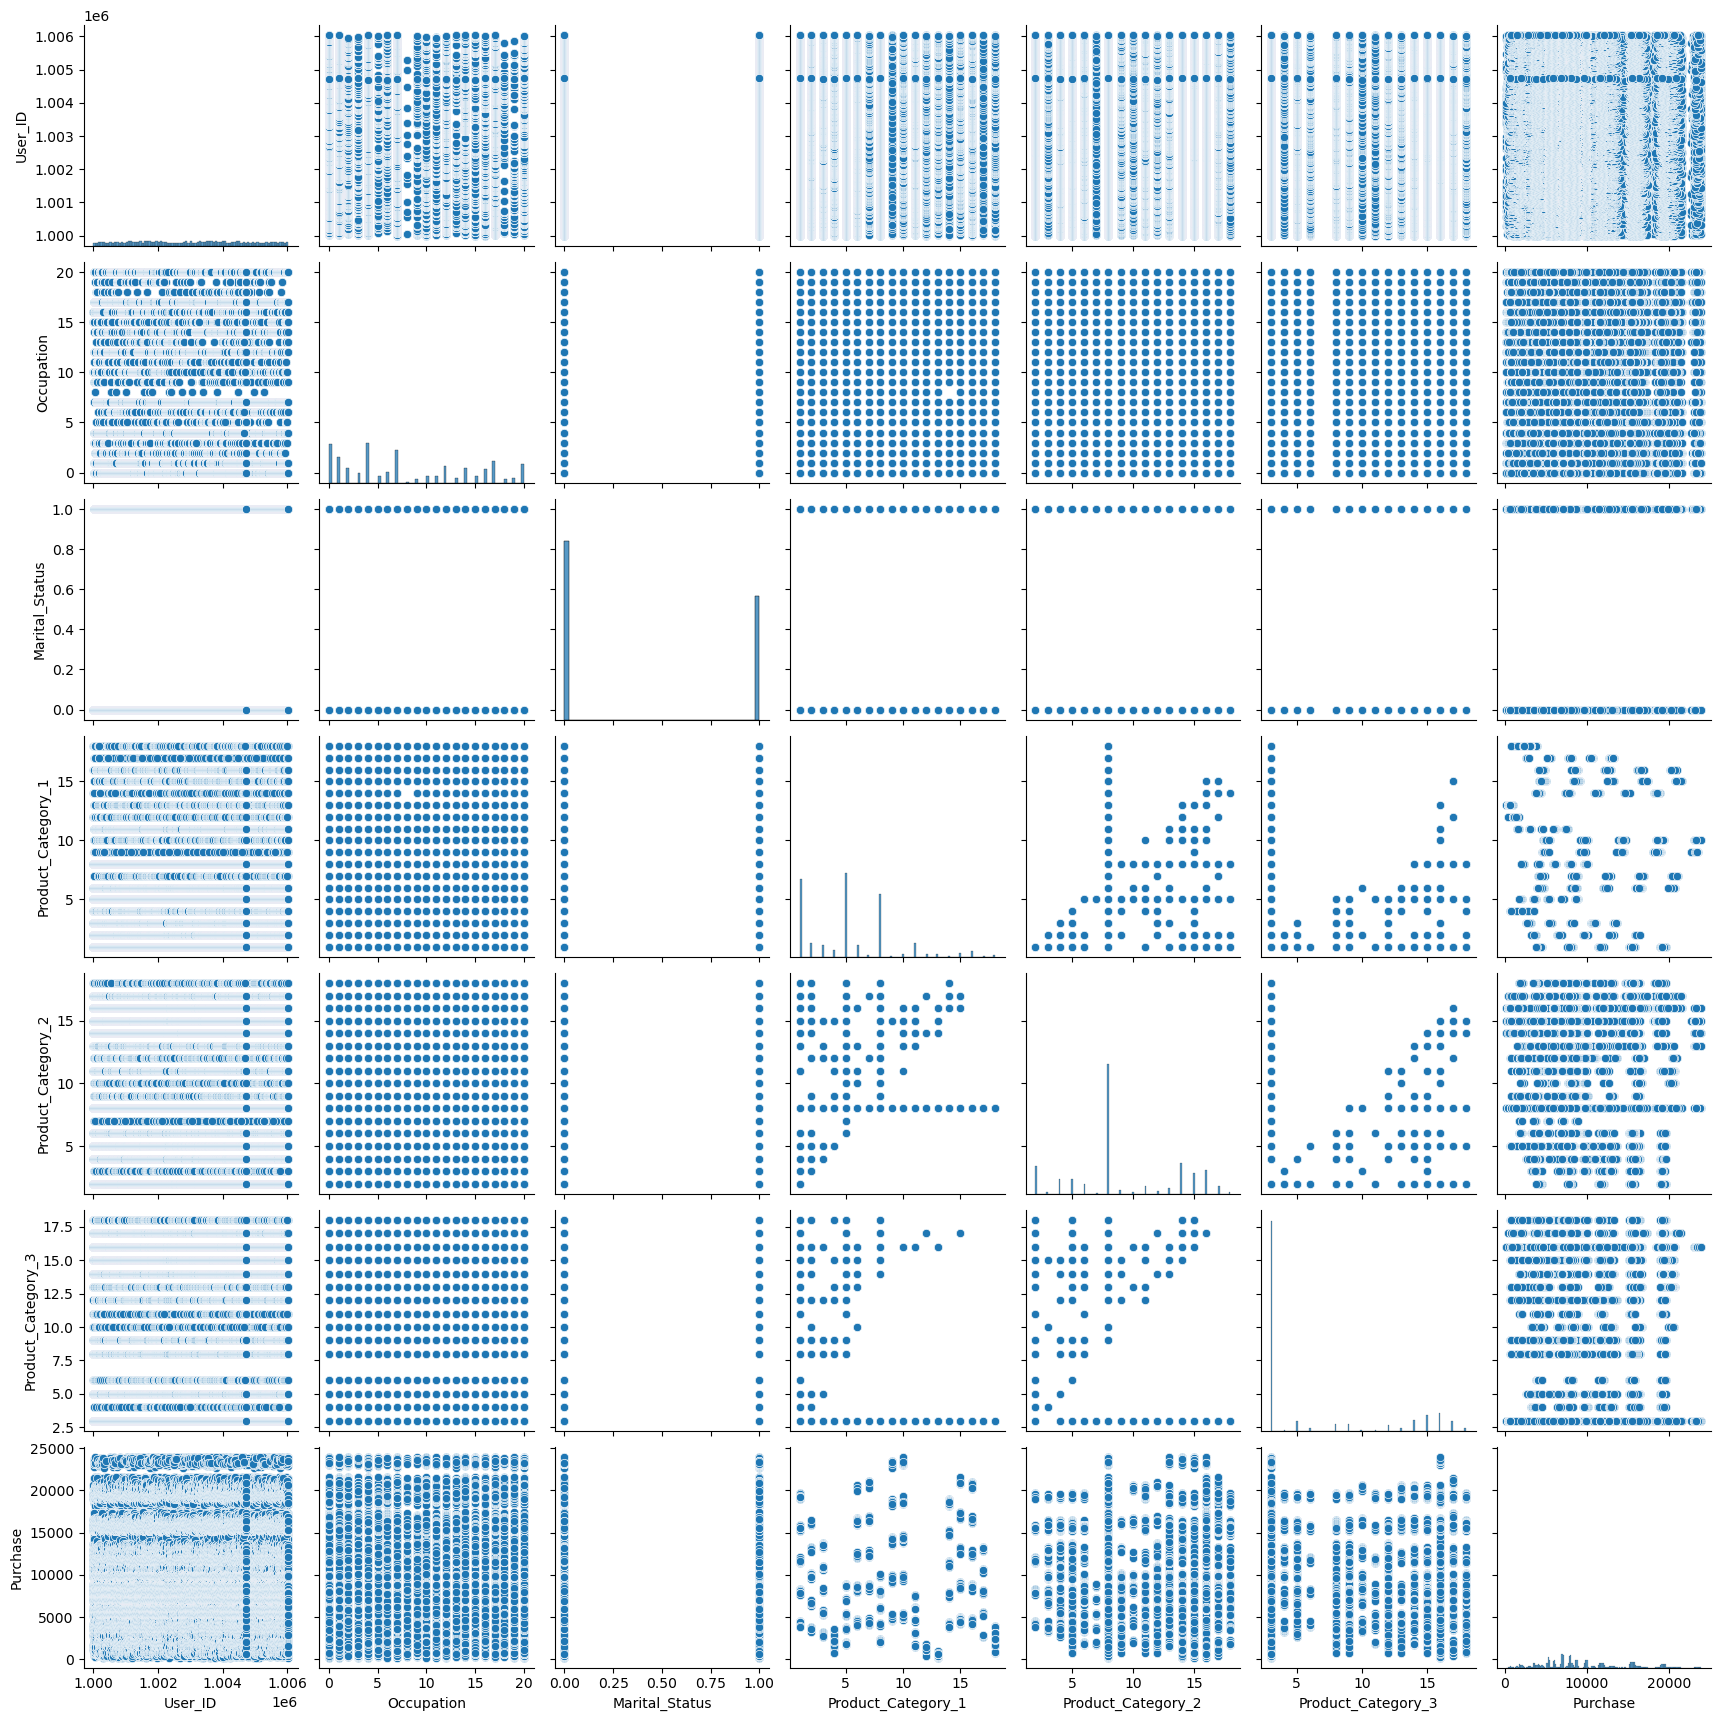

In [24]:
plt.figure(figsize=(14,14))
sns.pairplot(bf)
plt.show()

Top 10 Products

In [25]:
# Top 10 Products that were most bought.
bf_prod_agg= bf.groupby(by='Product_ID').agg({'User_ID':'count','Purchase': 'mean'}).reset_index().rename(columns={'User_ID': 'Count of User_ID','Purchase': 'Avg. Purchase'})
print("----------Top 10 Products that were most bought-----------\n")
print(bf_prod_agg.sort_values(by='Count of User_ID', ascending=False).head(10),"\n")
print("----------Top 10 Products that had highest Avg. purchase price-----------\n")
print(bf_prod_agg.sort_values(by='Avg. Purchase', ascending=False).head(10))

----------Top 10 Products that were most bought-----------

     Product_ID  Count of User_ID  Avg. Purchase
2534  P00265242              1858    7526.009150
1014  P00110742              1591   16582.381521
249   P00025442              1586   17359.663304
1028  P00112142              1539   15518.274204
565   P00057642              1430   15729.853147
1743  P00184942              1424   16896.679073
458   P00046742              1417   14728.086097
568   P00058042              1396    8617.268625
1353  P00145042              1384   14515.183526
581   P00059442              1384   17303.684249 

----------Top 10 Products that had highest Avg. purchase price-----------

     Product_ID  Count of User_ID  Avg. Purchase
834   P00086242               268   21297.865672
825   P00085342               542   20993.804428
1900  P00200642               261   20479.229885
1068  P00116142               627   20478.264753
1100  P00119342               304   20454.296053
1083  P00117642               

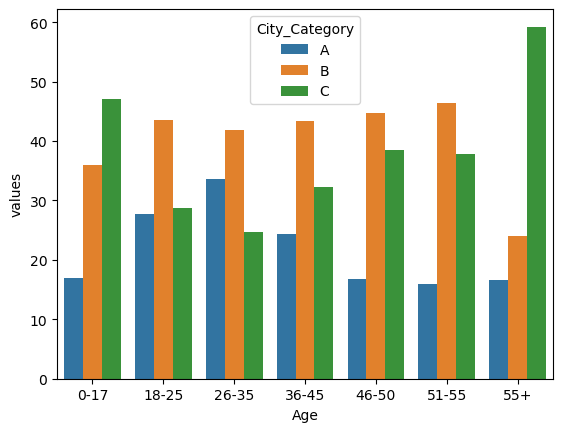

In [26]:
#Age Group distribution across Different Cities (in %)

bf_age_dist_citi=bf.groupby(['Age','City_Category']).agg({'User_ID':'count'}).unstack()
bf_age_dist_citi.columns=bf_age_dist_citi.columns.droplevel()

for i in range(len(bf_age_dist_citi)):
    age_sum=bf_age_dist_citi.iloc[i,:].sum()
    for j in range(bf_age_dist_citi.shape[1]):
        bf_age_dist_citi.iloc[i,j]=round(bf_age_dist_citi.iloc[i,j]/age_sum*100,2)

bf_age_dist_citi=bf_age_dist_citi.stack()
bf_age_dist_citi=bf_age_dist_citi.to_frame().reset_index(level='City_Category').rename(columns={0:'values'})

sns.barplot(data=bf_age_dist_citi, x=bf_age_dist_citi.index,y="values", hue="City_Category")
plt.show()


As we saw above, that most of the people in dataset are of age group 26-35 & mostly live in B city. From above graph, we see it does not follow obvious distribution across different age groups.

Age group 0-17 and 55+ mainly live in city C where as rest other age group mainly live in city B as we see B city has majority of population. It seems like City C is tier 3 city where younger people live and they go to Tier 1 or 2 city and come back once they turn 55.

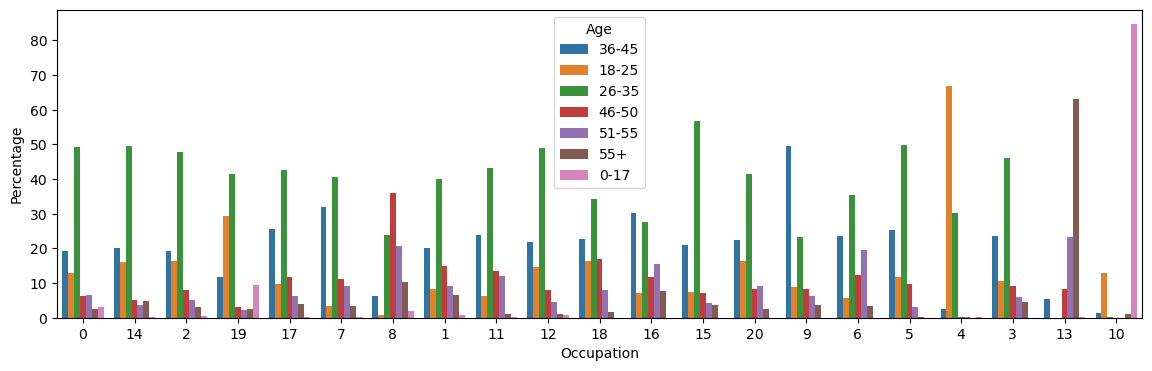

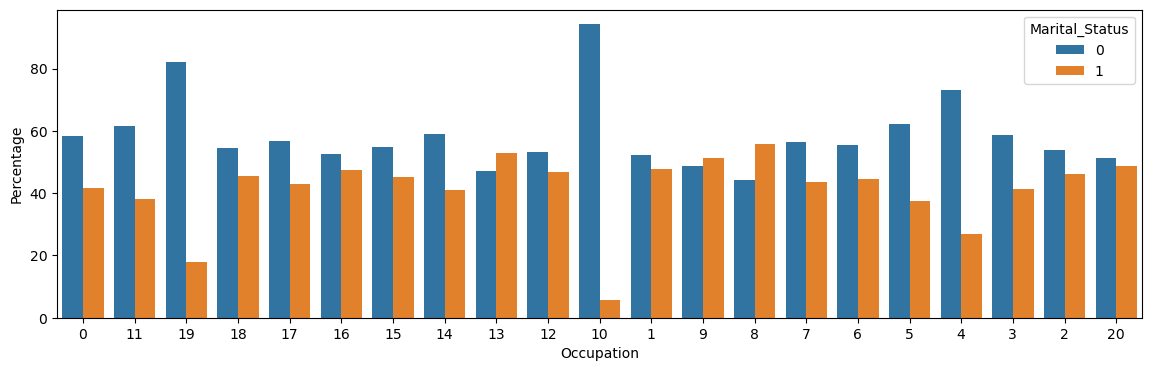

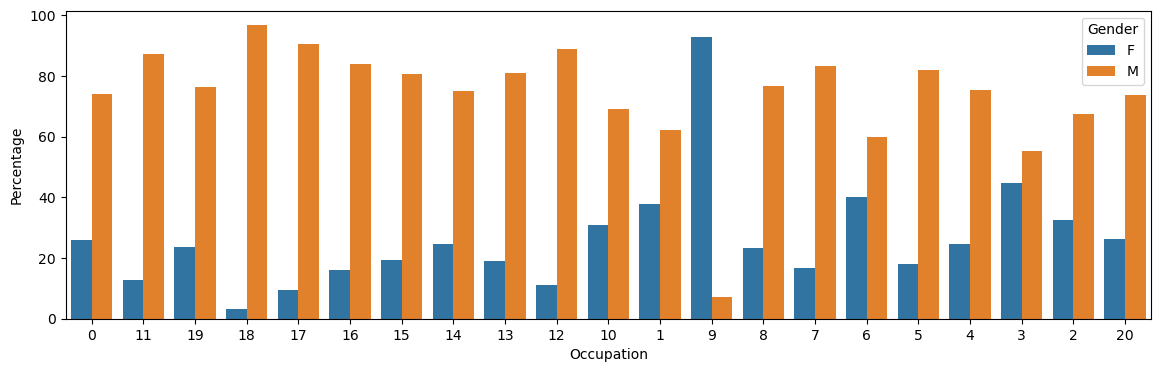

In [27]:
# Top Professions distribution in age Group.

for col in ['Age','Marital_Status','Gender']:
    plt.figure(figsize=(14,4))
    bf_by_prof=bf.groupby(['Occupation',col]).agg({'User_ID':'count'})
    df3=bf_by_prof.groupby(by="Occupation").apply(lambda x:100 * x / float(x.sum())).reset_index().rename(columns={'User_ID':'Percentage'})
    sns.barplot(data=df3, x='Occupation',y='Percentage', hue=col, order=df3['Occupation'].value_counts().index,
           hue_order=df3[col].value_counts().index)
    plt.show()

For Graph 1 - Across almost all occupation, we see more distribution of 26-35 same as higher distribution of this group in the entire dataset. However there are a few exceptions, Occupation 8 has more middle age people 46-50, Occupation 9 has more 36-45 age group people, Occupation 4 has mainly from yonger age 18-25, Occupation 13 & 10 oldest and youngest crowd respectively i.e. 55+ and 0-17

For Graph 2 - generally speaking, graph follow same distribution having more unmarried people than married people across almost all occupation except few exceptions. Occupation 13, 9, 8 have more married people than unmarried people. Occupation 10, although has more unmarried people but there are a very few married people

For Graph 3: It's very intresting to see that only occupation 9 has higher females than males. May be 9 profession is Air Hostess or teacher, from graphs above profession 9 has the lowest avg purchase price, so may be it's low paying occupation? Whereas profession 18 has a lot more males and very few females.

# DATA PRE-PROCESSING

We will pre-process the data before feeding the dataset to models. As part if pre-processing, will make all columns as Integer, perform data encoding.

In [28]:
# User_ID & Product_ID columns conversion to integer columns
bf['User_ID']=bf['User_ID']-100000
bf['Product_ID']=bf['Product_ID'].str.replace('P00','')
bf['Product_ID']=pd.to_numeric(bf['Product_ID'])

In [29]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  int64 
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Product_Category_2          537577 non-null  int64 
 10  Product_Category_3          537577 non-null  int64 
 11  Purchase                    537577 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 49.2+ MB


In [30]:
bf.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537567,904736,157542,M,18-25,20,A,1,1,8,14,3,1994
537568,904736,250642,M,18-25,20,A,1,1,11,8,3,5930
537569,904736,23142,M,18-25,20,A,1,1,5,14,3,7042
537570,904736,162442,M,18-25,20,A,1,1,1,16,3,15491
537571,904737,221442,M,36-45,16,C,1,0,1,2,5,11852
537572,904737,193542,M,36-45,16,C,1,0,1,2,3,11664
537573,904737,111142,M,36-45,16,C,1,0,1,15,16,19196
537574,904737,345942,M,36-45,16,C,1,0,8,15,3,8043
537575,904737,285842,M,36-45,16,C,1,0,5,8,3,7172
537576,904737,118242,M,36-45,16,C,1,0,5,8,3,6875


In [31]:
### Data Encoding  - Age, Gender, City Category are columns of type 'Object'. Either we
# can do Label Encoding or Get dummies. With Label Encoder, models may confuse them 
# being columns with orders. So we will perform conversion with Get dummies.

BF_all_data=pd.get_dummies(bf, columns=['Age','Gender','City_Category'], drop_first=True)
BF_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  int64 
 2   Occupation                  537577 non-null  int64 
 3   Stay_In_Current_City_Years  537577 non-null  object
 4   Marital_Status              537577 non-null  int64 
 5   Product_Category_1          537577 non-null  int64 
 6   Product_Category_2          537577 non-null  int64 
 7   Product_Category_3          537577 non-null  int64 
 8   Purchase                    537577 non-null  int64 
 9   Age_18-25                   537577 non-null  uint8 
 10  Age_26-35                   537577 non-null  uint8 
 11  Age_36-45                   537577 non-null  uint8 
 12  Age_46-50                   537577 non-null  uint8 
 13  Age_51-55                   5

In [32]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,900001,69042,F,0-17,10,A,2,0,3,8,3,8370
1,900001,248942,F,0-17,10,A,2,0,1,6,14,15200
2,900001,87842,F,0-17,10,A,2,0,12,8,3,1422
3,900001,85442,F,0-17,10,A,2,0,12,14,3,1057
4,900002,285442,M,55+,16,C,4+,0,8,8,3,7969



Converting categorical data to numerical

In [33]:
bf['Gender'].replace({'F':0,'M':1},inplace = True)
bf['City_Category'].replace({'A':0,'B':1,'C':2},inplace = True)
bf['Age'].replace({'0-17':17,'18-25':21,'26-35':31,'36-45':41,'46-50':48,'51-55':53,'55+':56},
                    inplace=True)
bf['Stay_In_Current_City_Years'].replace({'0':0,'1':1,'2':2,'3':3,'4+':4},
                                            inplace = True)

# ALGORITHMS PREPARERATION

In [41]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso, LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [42]:
#Splitting the dataset into X & Y

X=bf.drop('Purchase',axis=1)
y=bf['Purchase']

#train test data split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=None,shuffle=True)

In [47]:
def checkModelPerformane(model):
    model.fit(X_train.values, y_train.values)
    
    pred = model.predict(X_test.values)
    
    print("mean_squared_error: ",np.sqrt(mean_squared_error(y_test.values, pred))) 
    print("mean_absolute_error: ", np.sqrt(mean_absolute_error(y_test.values, pred)))
    #plot the result

    plt.scatter(y_test, pred)
    plt.xlabel('y test')
    plt.ylabel('Predictions')
    plt.show()
    
    

# Linear Regression

LinearRegression
mean_squared_error:  4638.091524827083
mean_absolute_error:  59.59982621472815


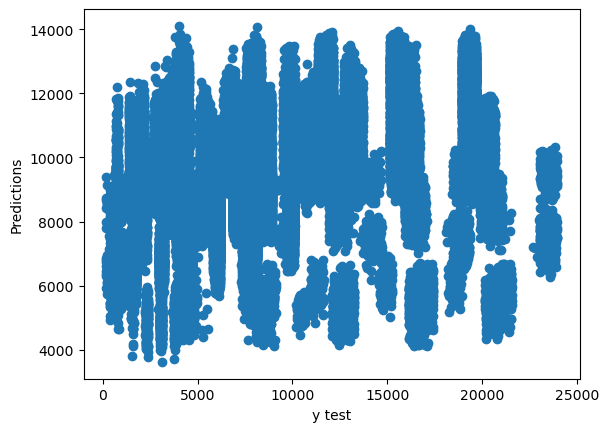

In [48]:
print("LinearRegression")
checkModelPerformane(LinearRegression())

# Ridge Regression

RidgeRegression
mean_squared_error:  4846.287923789539
mean_absolute_error:  62.36406140173645


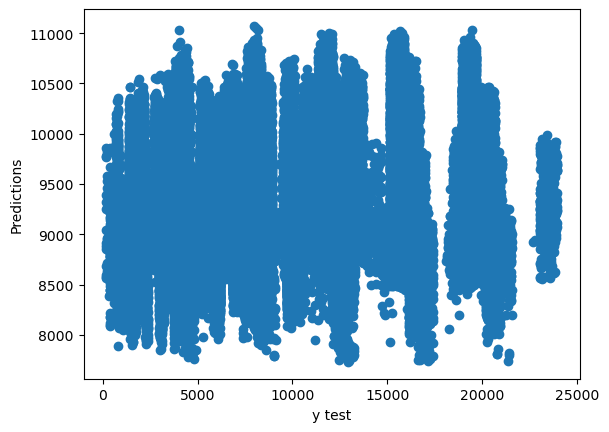

In [56]:
print("RidgeRegression")
checkModelPerformane(Ridge(alpha=5,solver='sag'))

# Lasso Regression

LinearRegression
mean_squared_error:  4638.098385002153
mean_absolute_error:  59.59924694633352


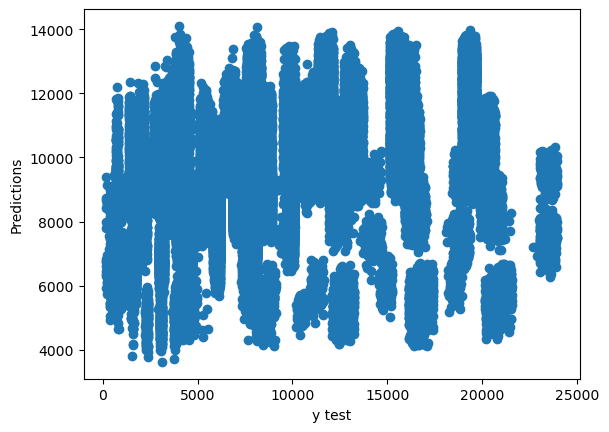

In [59]:
print("LinearRegression")
checkModelPerformane(Lasso())

RMSE & R2 score with Linear Regression are very less. Also in the above graph actual & predicted values are not normally distributed. I tried Lasso & Ridge Regression too which did not give much better results. none of the Linear model generated good results, so next will try non-linear models.

# Decision Tree Regressor

DecisionTreeRegressor
mean_squared_error:  3788.3368214634943
mean_absolute_error:  51.58126286569471


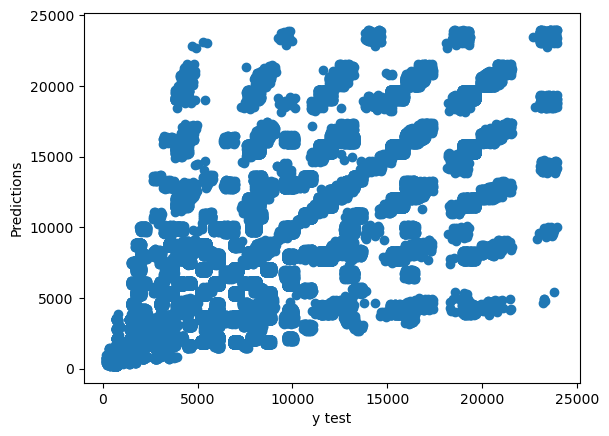

In [60]:
print("DecisionTreeRegressor")
checkModelPerformane(DecisionTreeRegressor(random_state=0))

Decision tree with default parameters give better results than Linear regression model with RMSE as 3788 & R2 score as 51.5%

# Random Forest Regressor

RandomForestRegressor
mean_squared_error:  2748.169422068521
mean_absolute_error:  45.02961348005693


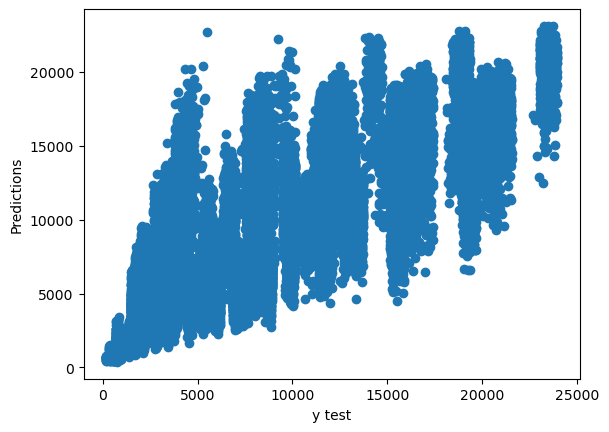

In [62]:
print("RandomForestRegressor")
checkModelPerformane(RandomForestRegressor(random_state=0))


Random Forest with default parameters give better results than Decision tree with RMSE as 2748 & R2 score 45%